# DSCI 6002 Midterm Project Code (Team 8)
### Jafar Vohra, Moureen Lukoye Nampijja, Smit Patel, and Mahesh Potu

## Data Ingestion

We will start by importing the necessary libraries and modules to help us complete this portion of the project...

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Our data is downloaded from Kaggle and uploaded to our team GitHub page. We will use pandas to read the CSV data from our local directory. The first five rows of the data are then able to be seen below...

In [2]:
data = pd.read_csv("heart_attack_prediction_dataset.csv")
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## Data Understanding / Cleaning

Let's take a look at the shape of this data...

In [3]:
data.shape

(8763, 26)

From the above output, we can see that there are 8763 rows of patient data with 26 columns (or features) of data related to each patient. Let's get an idea of what features are provided with this dataset...

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

We can see a lot of information from the output of the above code. Let's break it down...

- All features shows a non-null count equivalent to the number of total entries, thus saying there are no null values in this dataset. Let's check this another way to be sure...

In [5]:
data.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

- Let's also check to see if there are any duplicated records in this dataset...

In [6]:
data.duplicated().sum()

0

ZERO duplicated records in this dataset and ZERO missing records. This completes our initial data cleaning steps.

## Exploratory Data Analysis / Data Preparation

Let's dive into each feature...

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


- The target variable **Heart Attack Risk** is an indicator showing if the patient is at risk of a heart attack. The value is either 0 (no risk) or 1 (at risk). This variable is read in from the CSV file as an integer variable.

In [8]:
data["Heart Attack Risk"].value_counts()

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

In [9]:
px.pie(values = data["Heart Attack Risk"].value_counts().values,
       names = data["Heart Attack Risk"].value_counts().index,
       title = 'Cardiologist Patient Heart Attack Risk').show()

- The first feature provides data for the **Age** of the patient. This is read in from the CSV file as an integer variable.

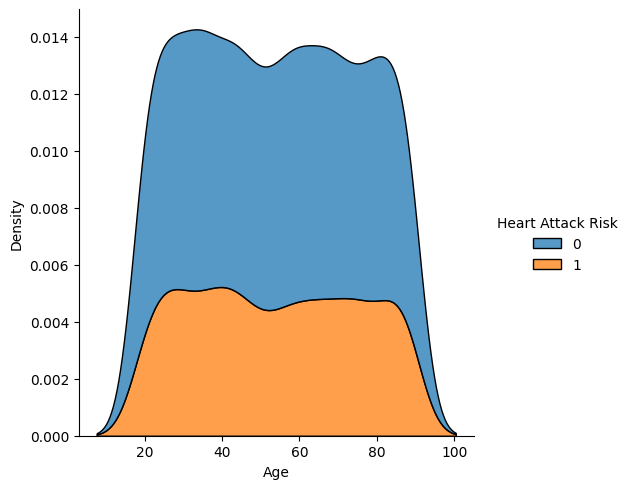

In [10]:
sns.displot(data, x="Age", hue="Heart Attack Risk", multiple="stack", kind="kde")

- The second feature is an identifier for the **Sex** of the patient, either Male or Female. This is read in from the CSV file as a string variable.

- We will engineer this feature to be labeled as integer values at the end of this section.

- The third feature provides data for the **Cholesterol**, measured in milligrams per deciliter (mg/dL). This is read in from the CSV file as an integer variable.

- The fourth feature provides the **Blood Pressure** of the patient, measured in millimeters of mercury (mm Hg), including the systolic and diastolic numbers. This is read in from the CSV file as a string variable, with the two number seperated by a "/".
- We will engineer this feature by seperating the **Systolic Blood Pressure** and **Diastolic Blood Pressure** for use later in the project

In [11]:
data["Blood Pressure"].sample()

1801    90/100
Name: Blood Pressure, dtype: object

In [12]:
data[["Systolic Blood Pressure","Diastolic Blood Pressure"]] = data["Blood Pressure"].str.split("/", expand=True).astype(int)
data[["Blood Pressure","Systolic Blood Pressure","Diastolic Blood Pressure"]].head()

,Blood Pressure,Systolic Blood Pressure,Diastolic Blood Pressure
0,158/88,158,88
1,165/93,165,93
2,174/99,174,99
3,163/100,163,100
4,91/88,91,88


In [13]:
data = data.drop(columns="Blood Pressure")
data.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


- The fifth feature provides the resting **Heart Rate**, measured in beats per minute (BPM), of the patient. This is read in from the CSV file as an integer variable.

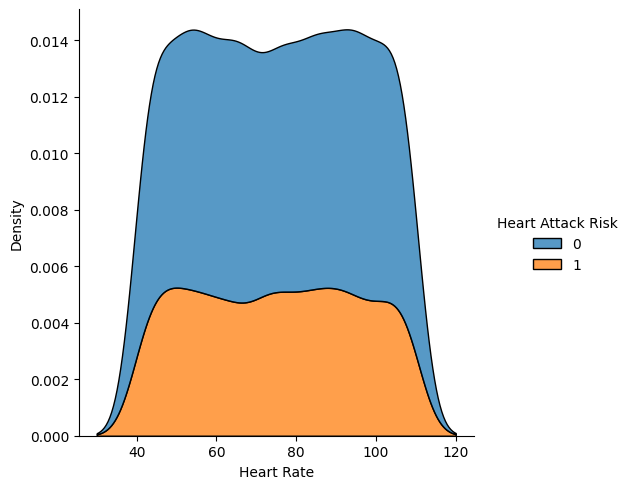

In [14]:
sns.displot(data,
            x="Heart Rate",
            hue="Heart Attack Risk",
            multiple="stack",
            kind="kde")

- The sixth feature is a classifier for the diagnosis for **Diabetes** in the patient. The value is either 0 (no diabetes) or 1 (diabetes diagnosed). This is read in from the CSV file as an integer variable.

In [15]:
px.pie(values = data["Diabetes"].value_counts().values,
       names = data["Diabetes"].value_counts().index,
       title = 'Diabetic Cardiologist Patients').show()

- The seventh feature is a classifier for **Family History** of heart attacks in the patient. The value is either 0 (no family member with prior heart attack) or 1 (family member with prior heart attack). This is read in from the CSV file as an integer variable.

- The eighth feature is a classifier for **Smoking** habits in the patient. The value is either 0 (no smoking) or 1 (smoker). This is read in from the CSV file as an integer variable.

In [16]:
px.pie(values = data["Smoking"].value_counts().values,
       names = data["Smoking"].value_counts().index,
       title = 'Smoking Cardiologist Patients').show()

- The ninth feature is a classifier for **Obesity** in the patient. The value is either 0 (not obese) or 1 (obese). This is read in from the CSV file as an integer variable.

- The tenth feature is a classifier for the **Alcohol Consumption** in the patient. The value is either 0 (no alcohol consumption) or 1 (alcohol consumption). This is read in from the CSV file as an integer variable.

In [17]:
px.pie(values = data["Alcohol Consumption"].value_counts().values,
       names = data["Alcohol Consumption"].value_counts().index,
       title = 'Drinking Cardiologist Patients').show()

- The eleventh feature provides the number of **Exercise Hours Per Week** for the patient. This is read in from the CSV file as a float variable.

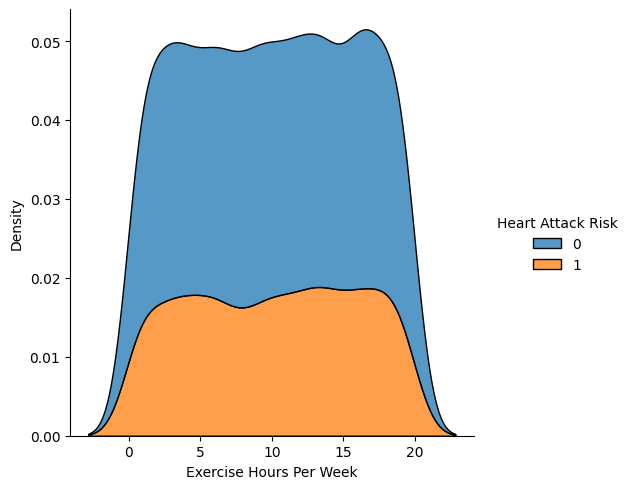

In [18]:
sns.displot(data,
            x="Exercise Hours Per Week",
            hue="Heart Attack Risk",
            multiple="stack",
            kind="kde")

- The twelfth feature provides the type of **Diet** the patient has, including Healthy, Unhealthy, and Average classifications. This is read in from the CSV file as a string variable.

- We will engineer this feature to be labeled as integer values at the end of this section.

In [19]:
px.pie(values = data["Diet"].value_counts().values,
       names = data["Diet"].value_counts().index,
       title = 'Diet of Cardiologist Patients').show()

- The thirteenth feature is a classifier for the **Previous Heart Problems** in the patient. The value is either 0 (no previous issues) or 1 (previous issues). This is read in from the CSV file as an integer variable.

- The fourteenth feature is a classifier for the **Medication Use** in the patient. The value is either 0 (no use) or 1 (use). This is read in from the CSV file as an integer variable.

- The fifteenth feature provides the **Stress Level** of the patient on a scale from 1 to 10. This is read in from the CSV file as an integer variable.

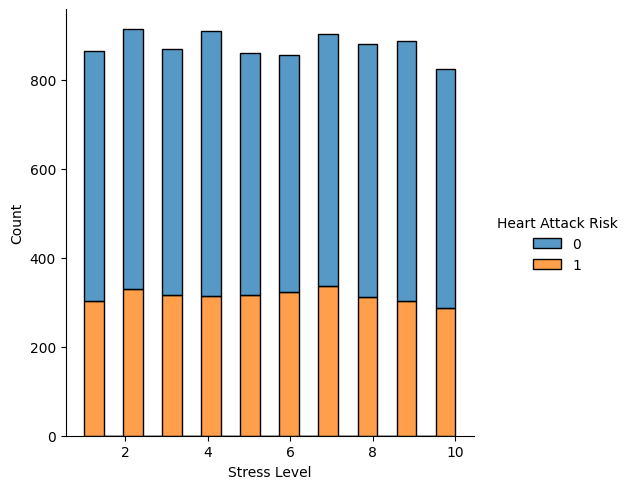

In [20]:
sns.displot(data,
            x="Stress Level",
            hue="Heart Attack Risk",
            multiple="stack")

- The sixteenth feature provides the number of **Sedantary Hours Per Day** for the patient. This is read in from the CSV file as a float variable.

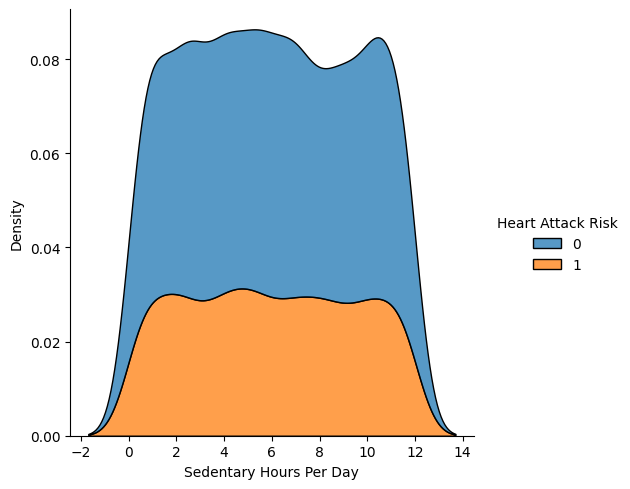

In [21]:
sns.displot(data,
            x="Sedentary Hours Per Day",
            hue="Heart Attack Risk",
            multiple="stack",
            kind='kde')

- The seventeenth feature provides the annual **Income** of the patient, measured in US Dollars ($). This is read in from the CSV file as an integer variable.

- The eighteenth feature provides the **BMI** for the patient. This is read in from the CSV file as a float variable.

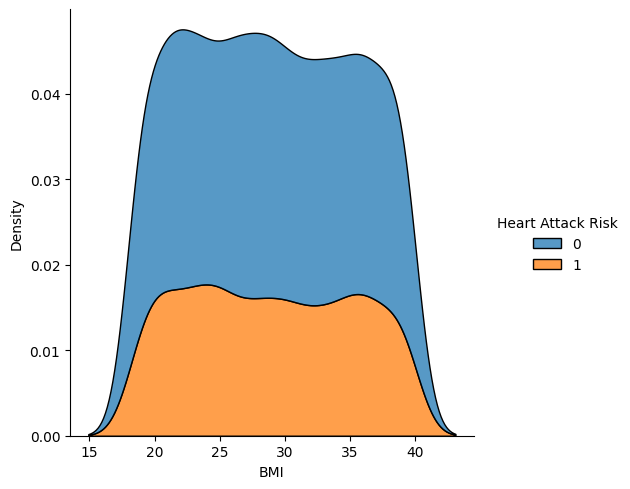

In [22]:
sns.displot(data,
            x="BMI",
            hue="Heart Attack Risk",
            multiple="stack",
            kind="kde")

- The nineteenth feature provides the **Triglycerides** of the patient, measured in milligrams per deciliter (mg/dL). This is read in from the CSV file as an integer variable.

- The twentieth feature represents the number of **Physical Activity Days Per Week** of the patient. This is read in from the CSV file as an integer variable.

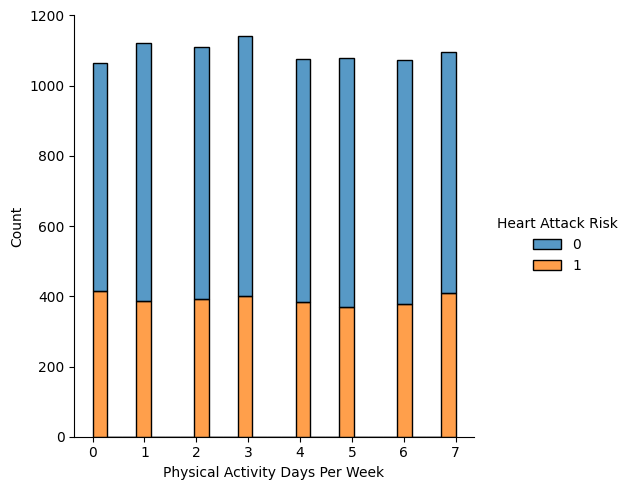

In [23]:
sns.displot(data,
            x="Physical Activity Days Per Week",
            hue="Heart Attack Risk",
            multiple="stack")

- The twenty-first feature represents the number of **Sleep Hours Per Day** of the patient. This is read in from the CSV file as an integer variable.

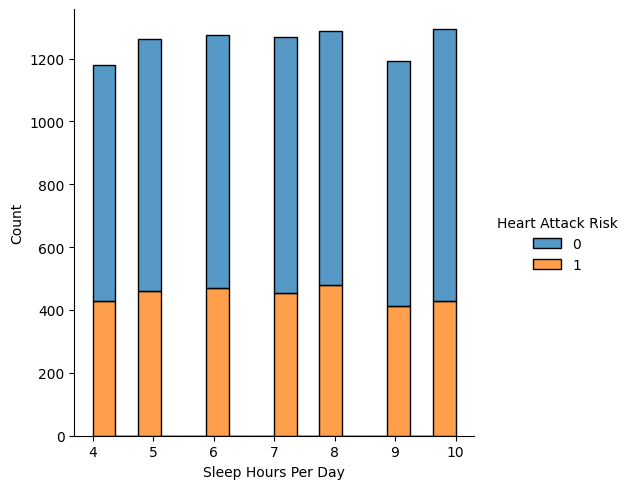

In [24]:
sns.displot(data,
            x="Sleep Hours Per Day",
            hue="Heart Attack Risk",
            multiple="stack")

- The **Country**, **Continent**, and **Hemisphere** columns provide geographical data of the patients in the form of strings.

In [25]:
px.pie(values = data["Country"].value_counts().values,
       names = data["Country"].value_counts().index,
       title = 'Country of Cardiologist Patients').show()

In [26]:
px.pie(values = data["Continent"].value_counts().values,
       names = data["Continent"].value_counts().index,
       title = 'Continent of Cardiologist Patients').show()

Now that we have visualized each of the features that are included in the dataset, let's observe if there are any underlying relationships between variables that we should be aware of by building a correlation heat map...

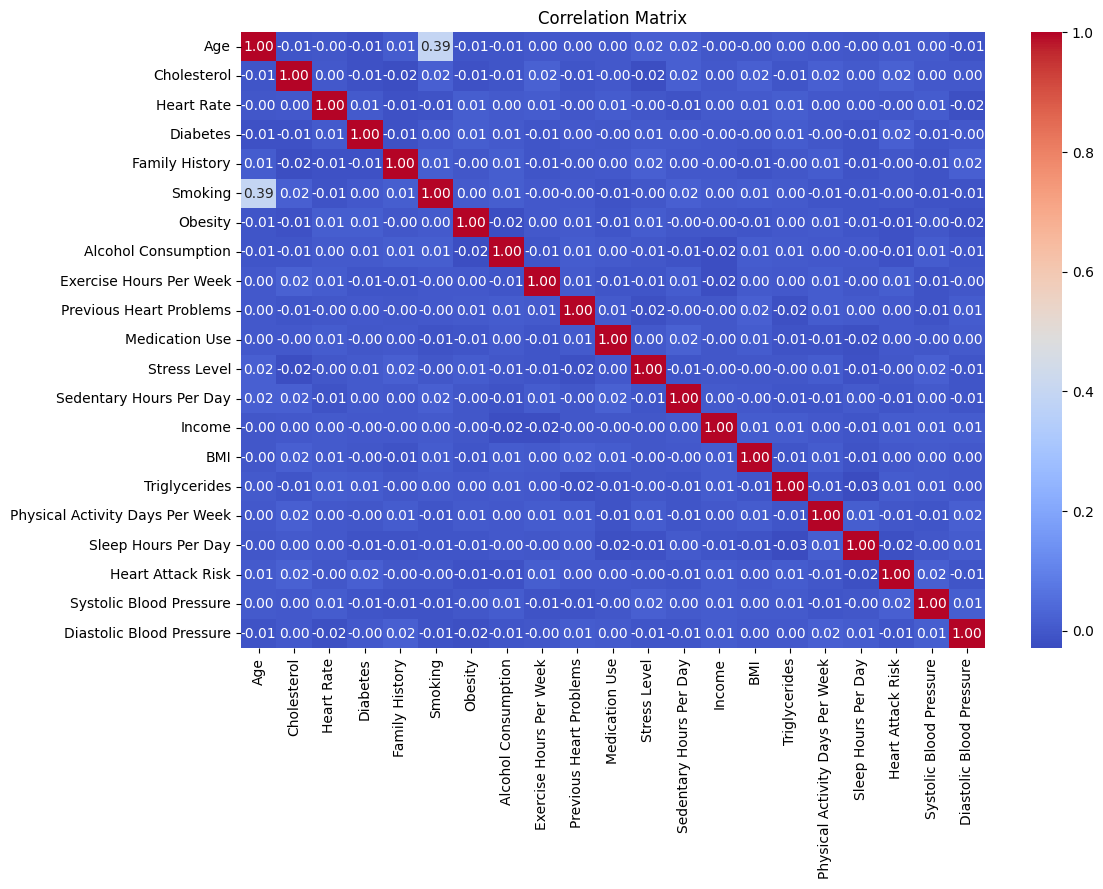

In [27]:
# Exclude non-numeric columns before creating the correlation matrix
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The only linear relationship that appears is between the **Age** and **Smoking** variables. Let's observe this with one more plot...

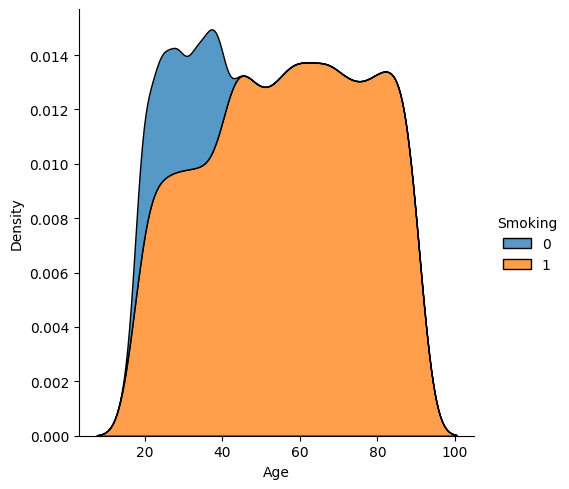

In [28]:
sns.displot(data,
            x="Age",
            hue="Smoking",
            multiple="stack",
            kind="kde")

It appears as though all the patients above the age of approximately 45 years old are smokers in this dataset. We will keep this in mind as we proceed.

Now, lets engineer the **Sex** and **Diet** features as we mentioned we would above...

In [29]:
data['Sex'] = LabelEncoder().fit_transform(data['Sex']) # Male = 1, Female = 0
data['Diet'] = LabelEncoder().fit_transform(data['Diet']) # Average = 0, Healthy = 1, Unhealthy = 2

data.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure
0,BMW7812,67,1,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,1,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,0,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,1,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,1,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


## Model Building / Evaluation

In [105]:
X = data.drop(columns = ['Patient ID', 'Country', 'Continent', 'Hemisphere','Heart Attack Risk'])
y = data['Heart Attack Risk']

In [106]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20 , random_state = 111)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

models = {'Logistic Regression': LogisticRegression(),
          'K-Nearest Neighbors': KNeighborsClassifier(),
          'Support Vector Machines': SVC(),
          'Naive Bayes': GaussianNB(),
          'Random Forest': RandomForestClassifier(),
          'XGBoost': XGBClassifier(),
          'Decision Tree': DecisionTreeClassifier(),
          'Gradient Boosted': GradientBoostingClassifier(),
          'AdaBoost': AdaBoostClassifier(),
          'Bagging': BaggingClassifier()}

for i in models:
    mod = models[i]
    mod.fit(train_X, train_y)
    mod_pred = mod.predict(test_X)
    recall = recall_score(test_y, mod_pred)
    print('Recall of '+i+': ', recall)
    print(confusion_matrix(test_y, mod_pred))

Recall of Logistic Regression:  0.0
[[1125    0]
 [ 628    0]]
Recall of K-Nearest Neighbors:  0.2372611464968153
[[872 253]
 [479 149]]
Recall of Support Vector Machines:  0.0
[[1125    0]
 [ 628    0]]
Recall of Naive Bayes:  0.0
[[1125    0]
 [ 628    0]]
Recall of Random Forest:  0.020700636942675158
[[1099   26]
 [ 615   13]]
Recall of XGBoost:  0.2054140127388535
[[912 213]
 [499 129]]
Recall of Decision Tree:  0.3630573248407643
[[693 432]
 [400 228]]
Recall of Gradient Boosted:  0.01751592356687898
[[1105   20]
 [ 617   11]]
Recall of AdaBoost:  0.02388535031847134
[[1110   15]
 [ 613   15]]
Recall of Bagging:  0.1305732484076433
[[969 156]
 [546  82]]


In [108]:
from sklearn.model_selection import GridSearchCV
# Create a DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini'],  # The function to measure the quality of a split
    'max_depth': [None, 50],  # Maximum depth of the tree
    'min_samples_split': [2],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1],  # Minimum number of samples required to be at a leaf node
    'min_impurity_decrease': [0.0, 0.2],  # Minimum impurity decrease for a split
    'max_leaf_nodes': [None, 10],  # Maximum number of leaf nodes in the tree
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(train_X, train_y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_X)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(test_y, y_pred))
recall = recall_score(test_y, y_pred)
print('Recall of Best Decision Tree Model: ', recall)
print(confusion_matrix(test_y, y_pred))

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      1125
           1       0.34      0.36      0.35       628

    accuracy                           0.52      1753
   macro avg       0.49      0.49      0.49      1753
weighted avg       0.53      0.52      0.53      1753

Recall of Best Decision Tree Model:  0.35509554140127386
[[696 429]
 [405 223]]


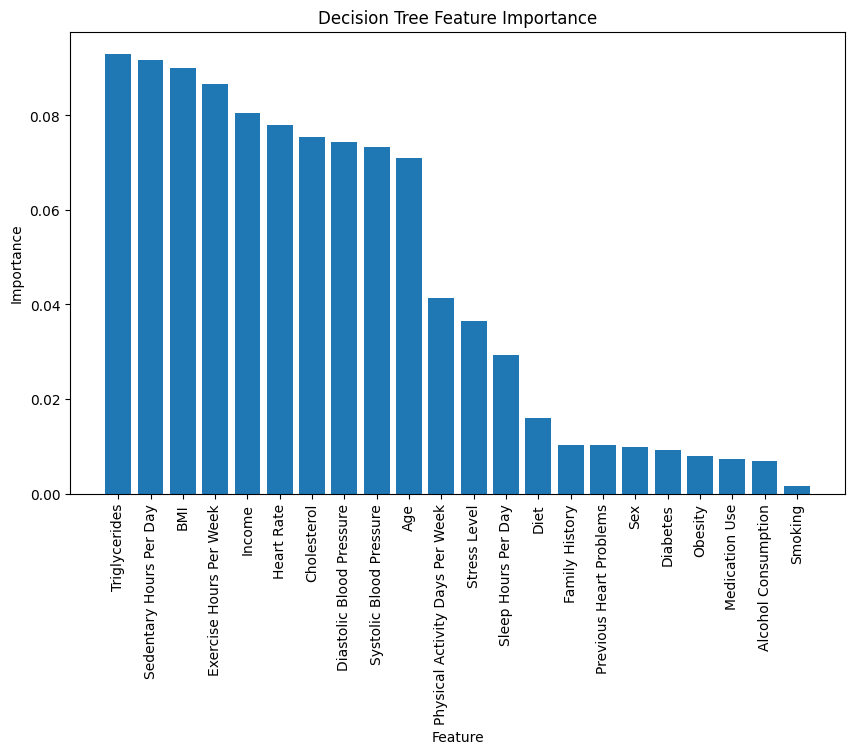

In [109]:
# Get feature importances
feature_importance = best_model.feature_importances_

# Get the corresponding feature names
feature_names = list(X.columns)  # Replace with the actual feature names

# Sort the features based on importance
sorted_idx = feature_importance.argsort()[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Decision Tree Feature Importance")
plt.show()